In [19]:
import pandas as pd
pd.set_option('display.max_rows',10)
pd.set_option('display.max_columns',None)

import seaborn as sns

import scipy as sp
import numpy as np

from scipy import stats

import matplotlib.pyplot as plt

import warnings
warnings.simplefilter('ignore')

In [20]:
#https://til.tafkas.net/posts/seaborn-correlation-coefficient-on-facetgrid/
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.025, 0.95), xycoords=ax.transAxes)
    
def num_escape(x, y, threshold, label,**kws):
    df = pd.DataFrame()
    df['x'] = x
    df['y'] = y
    #max_x=df['x'].max()
    #max_y=df['y'].max()
    #df = df.query(f"x>{threshold*max_x} & y>{threshold*max_y}")
    df = df.query(f"x>{threshold} & y>{threshold}")
    num_muts = len(df)
    ax = plt.gca()
    ax.annotate(f"{label}: {num_muts}", xy=(0.65,0.95), xycoords=ax.transAxes)
    #plt.axhline(y=threshold*max_x,color='black',dashes=(1,1))
    #plt.axvline(x=threshold*max_y,color='black',dashes=(1,1))
    plt.axhline(y=threshold,color='black',dashes=(1,1))
    plt.axvline(x=threshold,color='black',dashes=(1,1))
    
def make_heatmap_csv(input_df,position_list,aas,fillna_value):
    output_df = pd.DataFrame()
    for p in noteable_position_list:
        temp_df = input_df.query(f"antibody == '{sel}' & background == '{bkg}' & position == '{p}' ")
        temp_df['mut_aa']=temp_df['aa_substitutions'].str[-1:]
        temp_pivot = temp_df.pivot_table(index = 'position', columns = 'mut_aa', values = 'normalized_average').reset_index()
        output_df = pd.concat([output_df,temp_pivot],ignore_index=True)
    
        
    #loop through all amino acids and if it is not in the heatmap df (because that aa wasn't selected for), make its value NaN
    for aa in aas:
        if aa not in output_df.columns:
            output_df[f'{aa}'] = np.nan
        else:
            continue
    # make sure all the positions are included
    for p in noteable_position_list:
        if str(p) not in list(output_df['position']):
            t_df = pd.DataFrame()
            t_df['position'] = [f'{p}']
            output_df = pd.concat([output_df,t_df],ignore_index=True)
        
    #only keep the position and aas
    output_df = output_df[['position']+aa_list]
        
    #sort the values by position so all heatmaps look the same
    output_df = output_df.sort_values(by='position',ascending=True).fillna(fillna_value)
    #heatmap_df = heatmap_df.sort_values(by='position',ascending=True).fillna(1000)
    return output_df

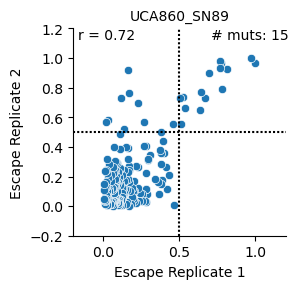

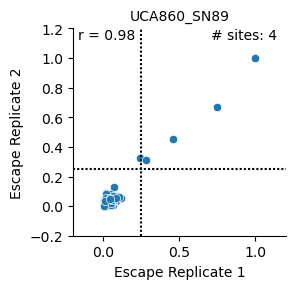

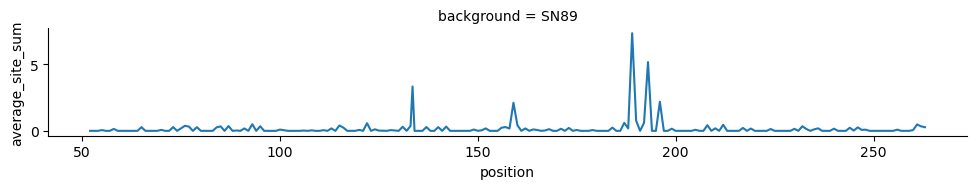

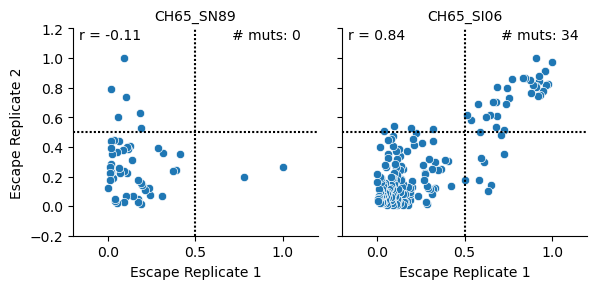

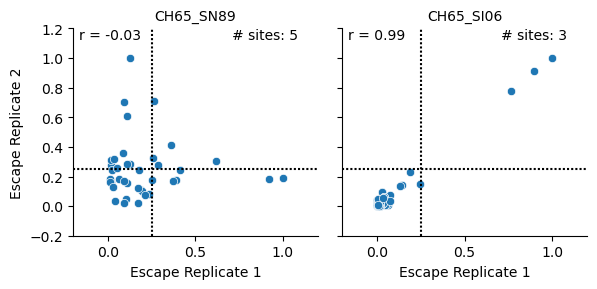

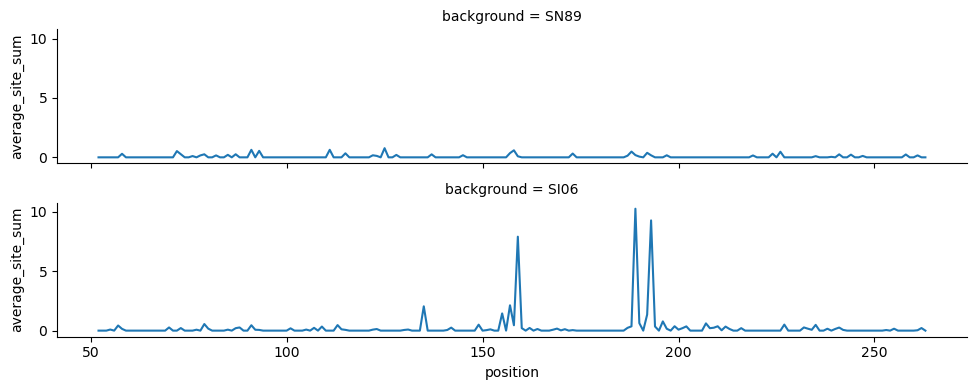

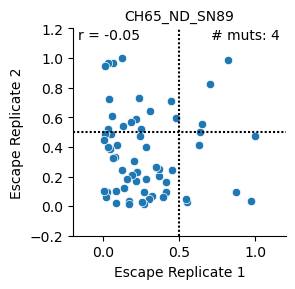

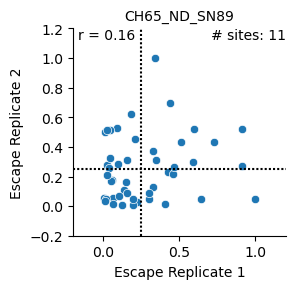

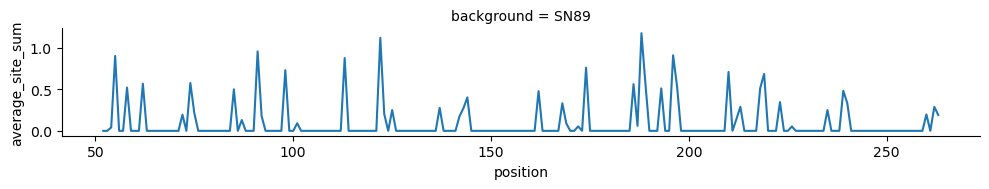

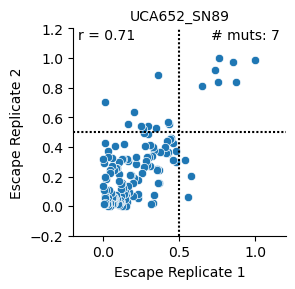

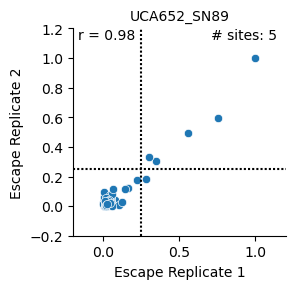

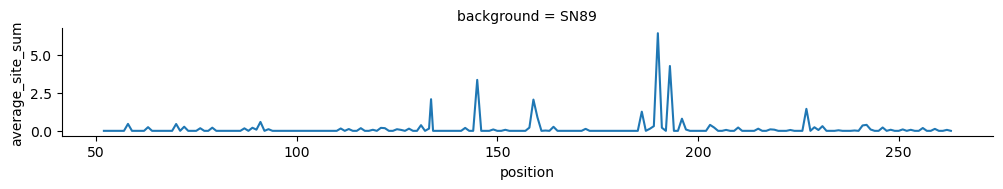

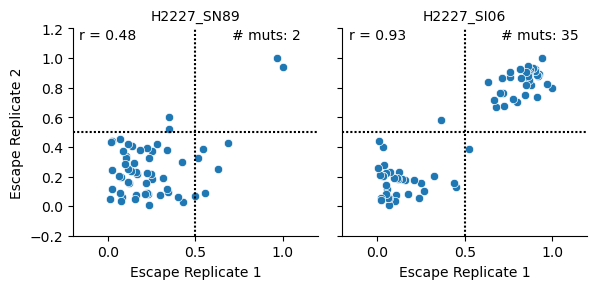

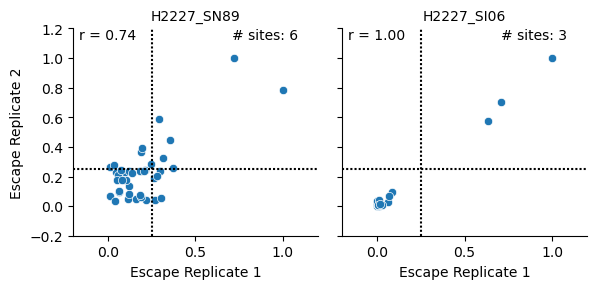

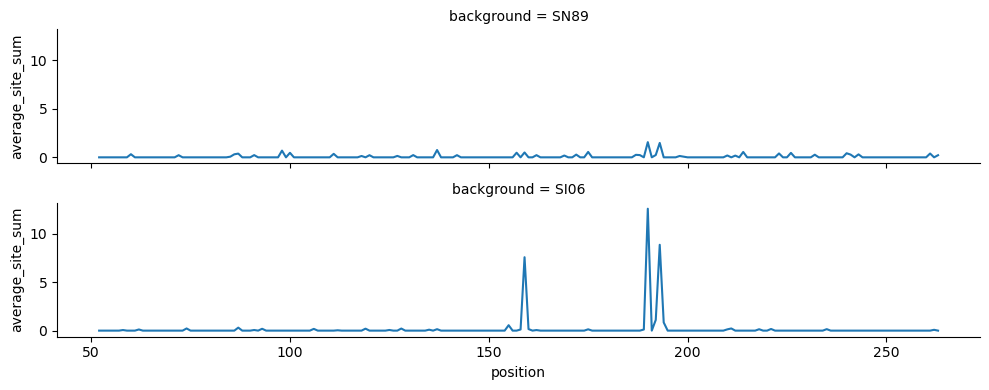

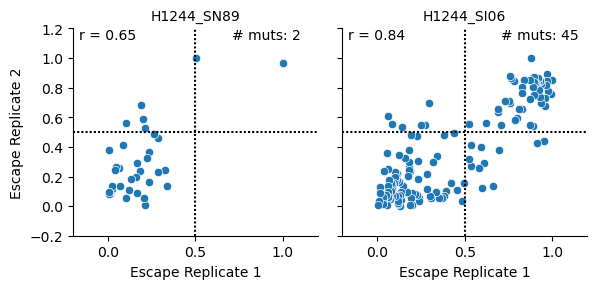

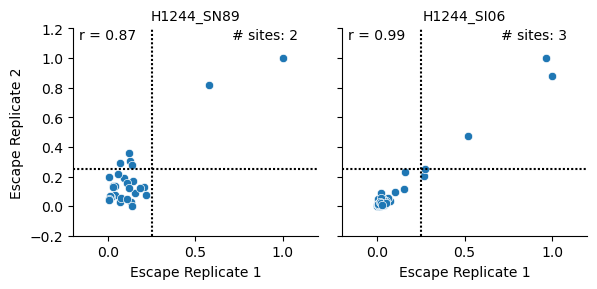

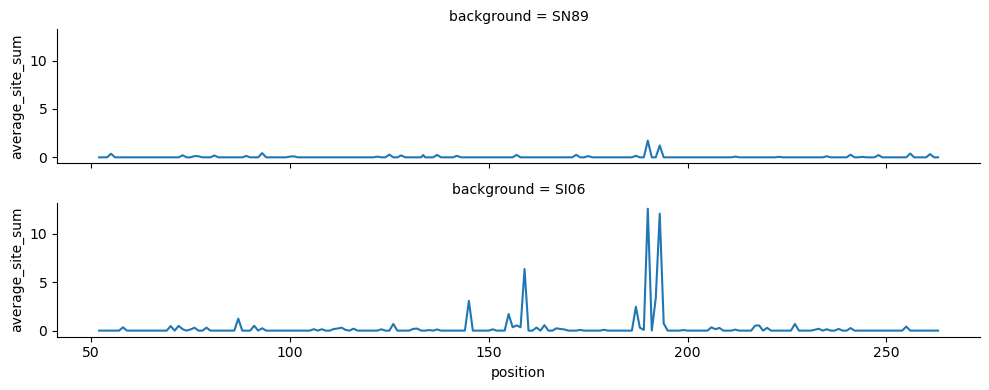

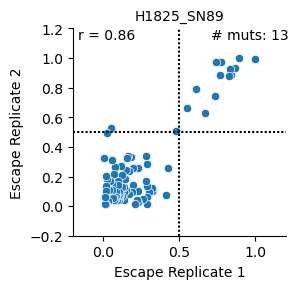

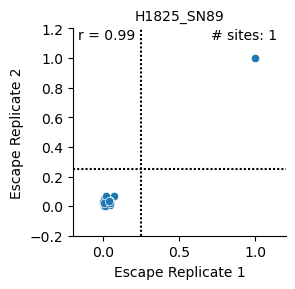

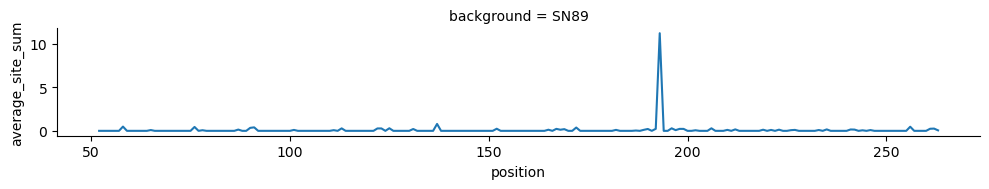

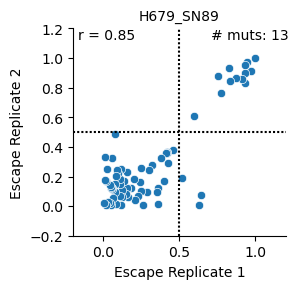

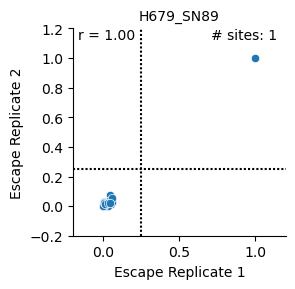

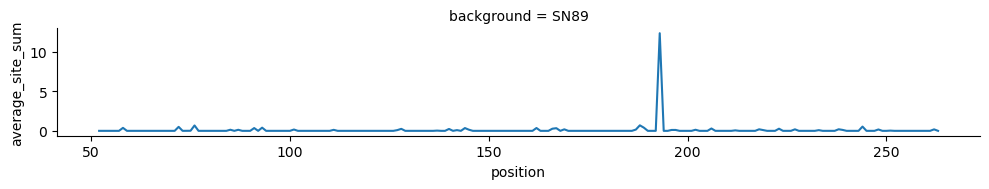

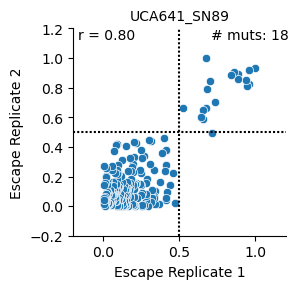

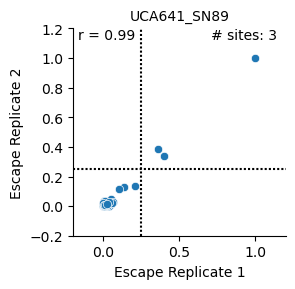

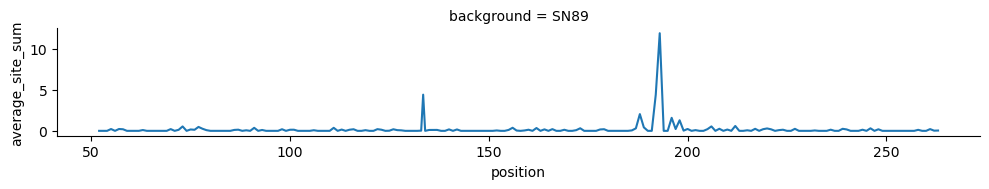

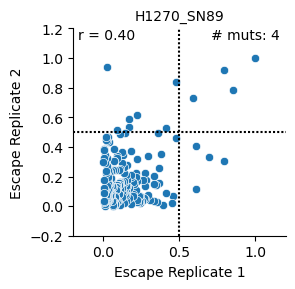

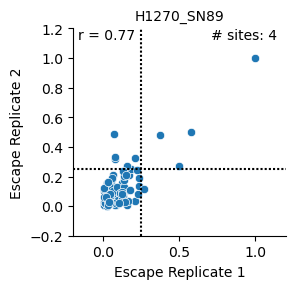

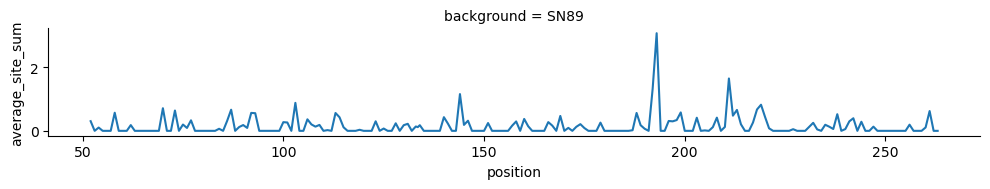

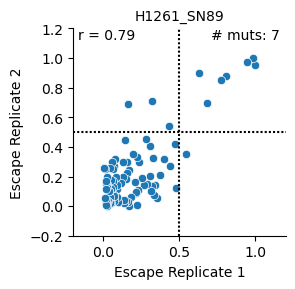

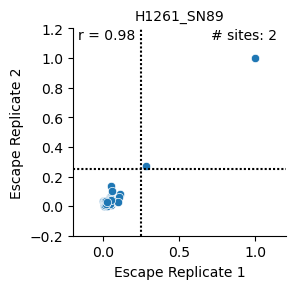

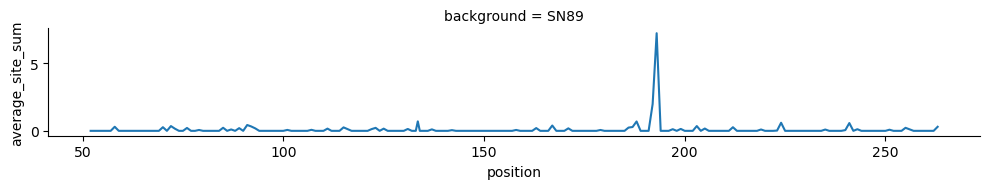

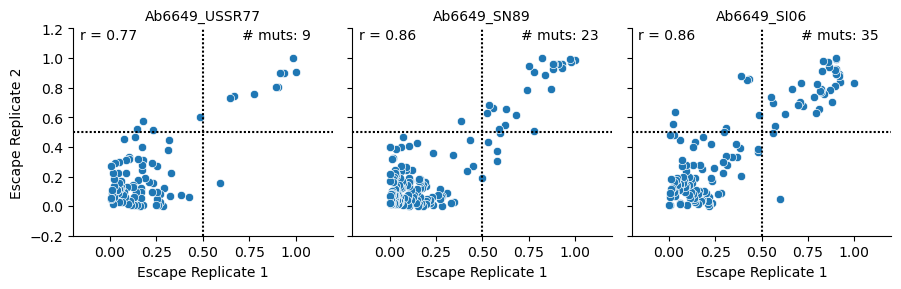

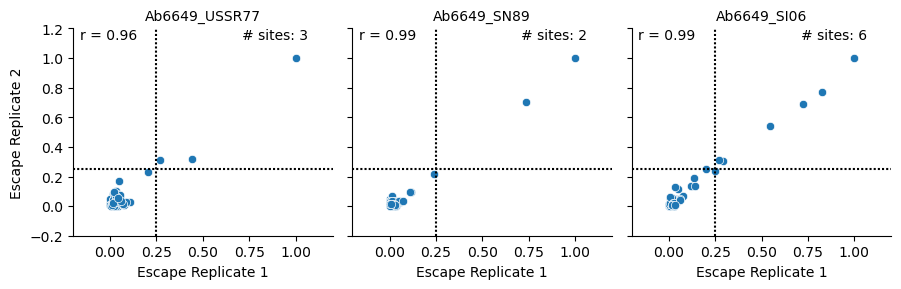

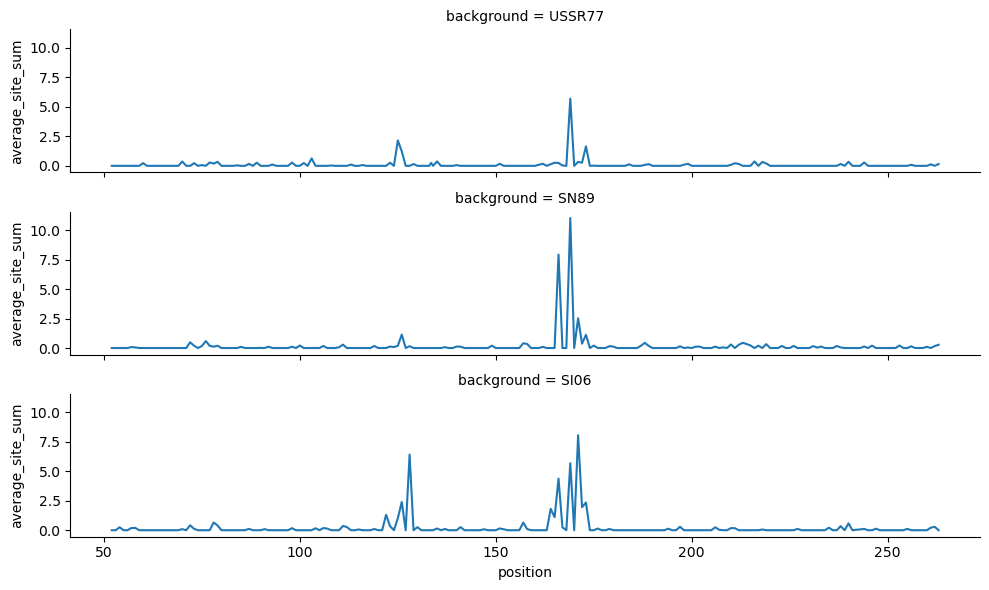

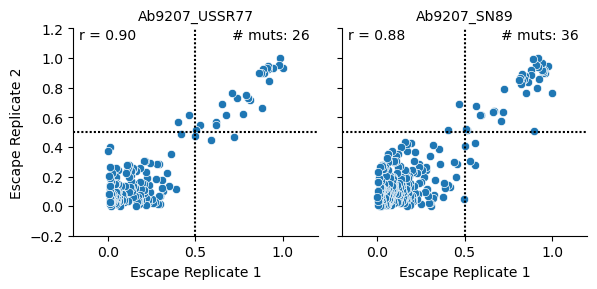

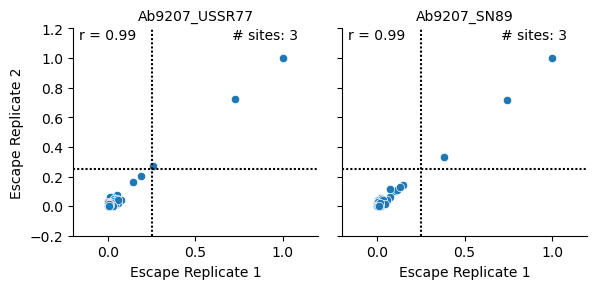

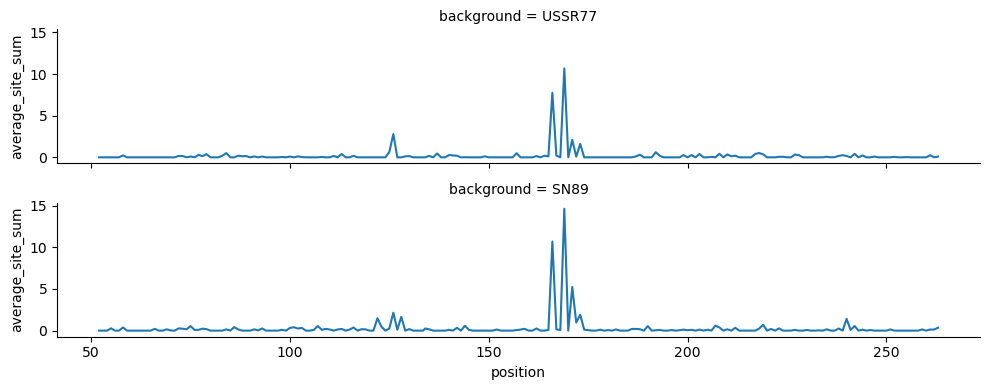

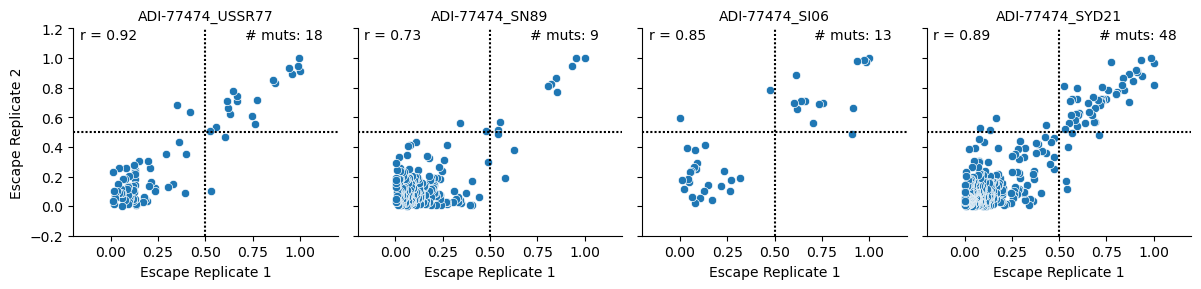

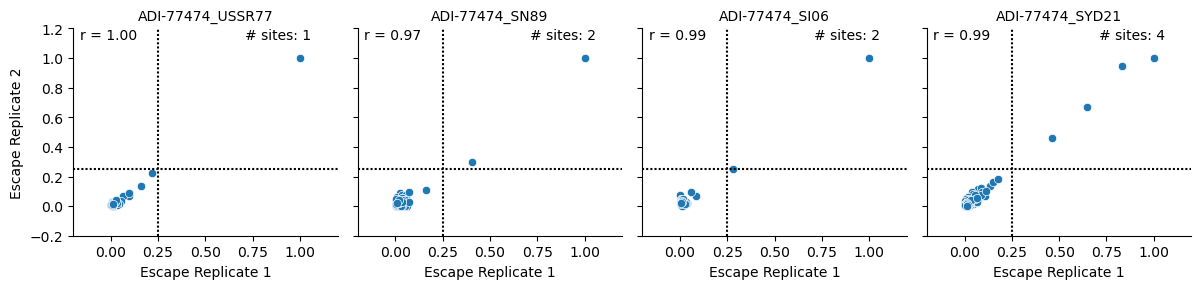

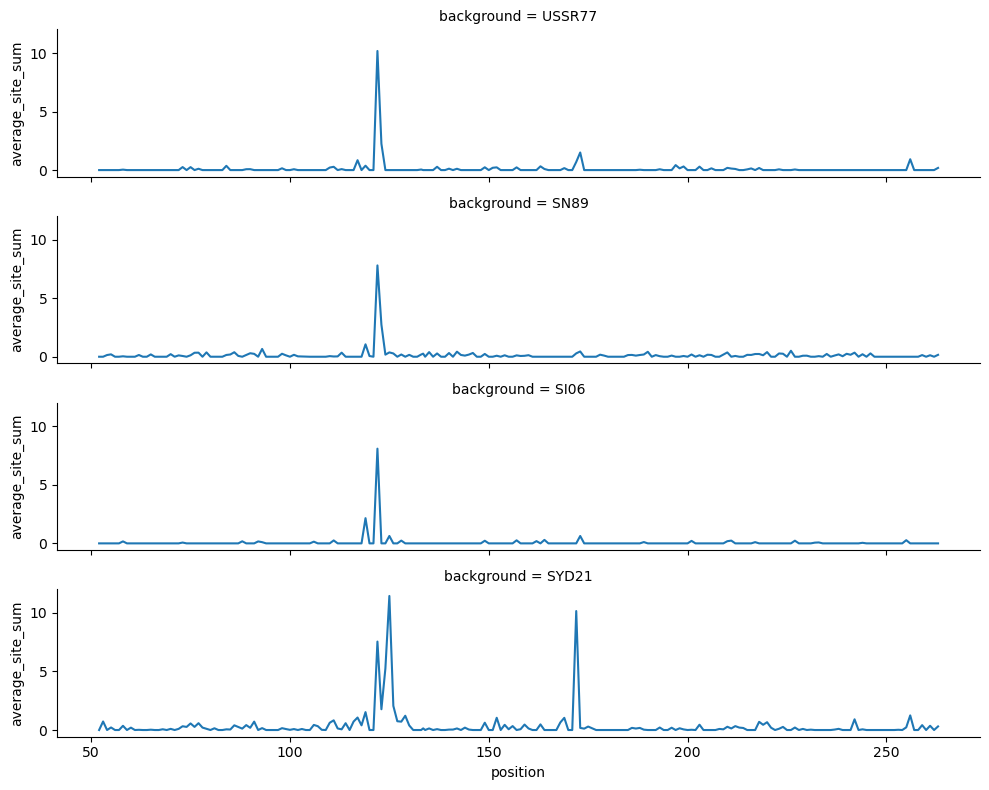

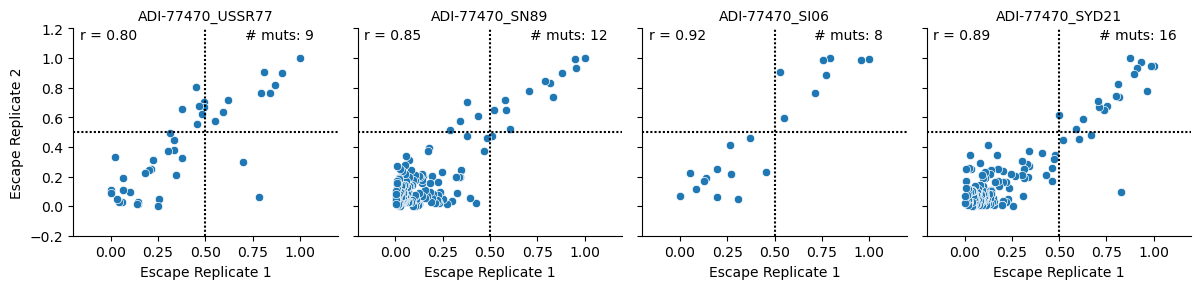

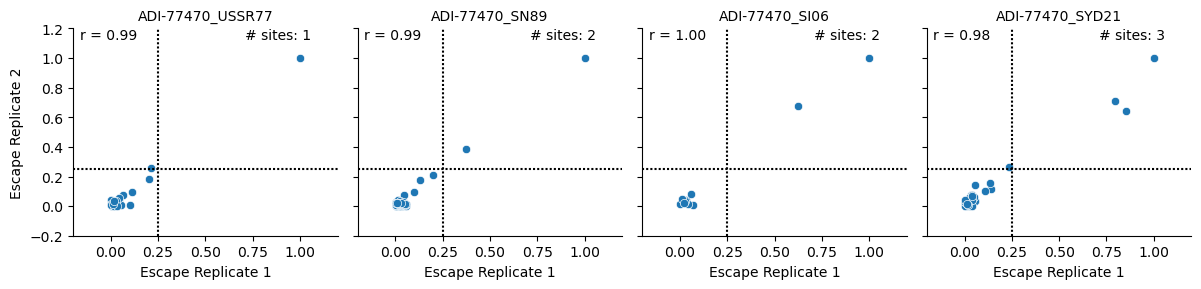

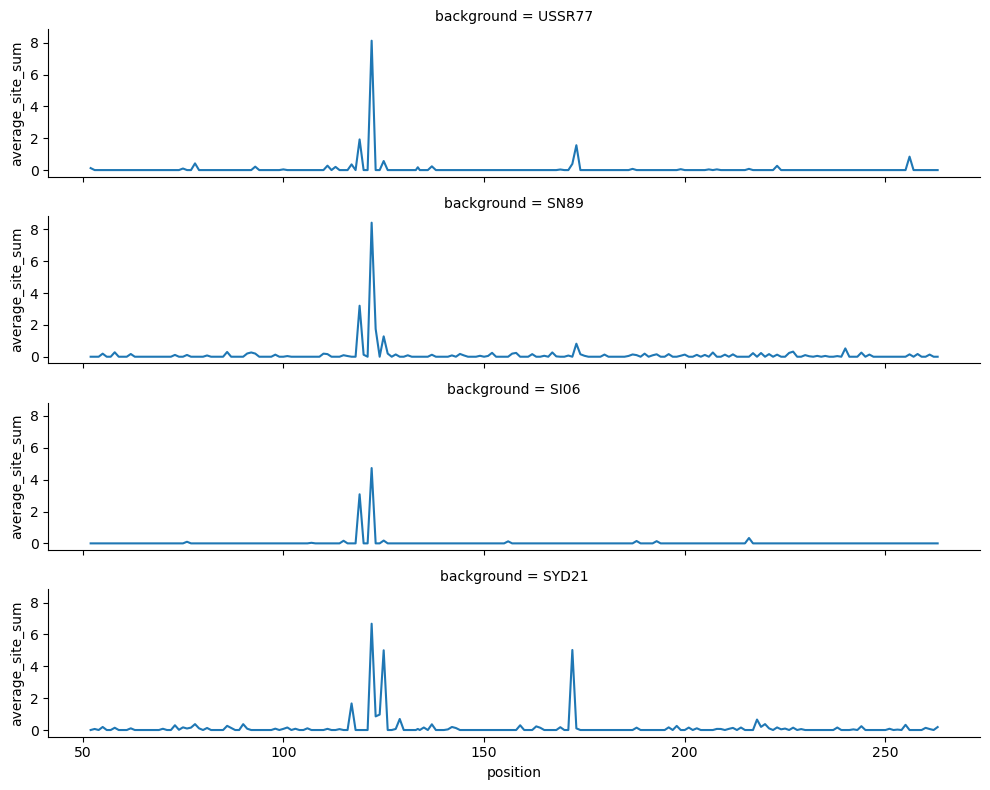

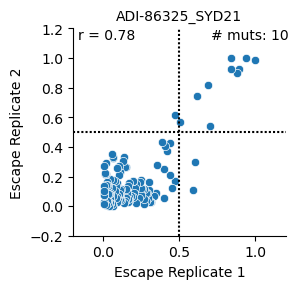

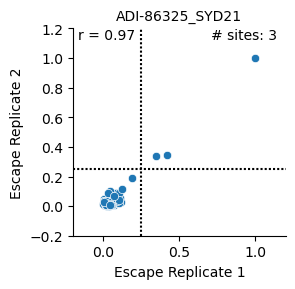

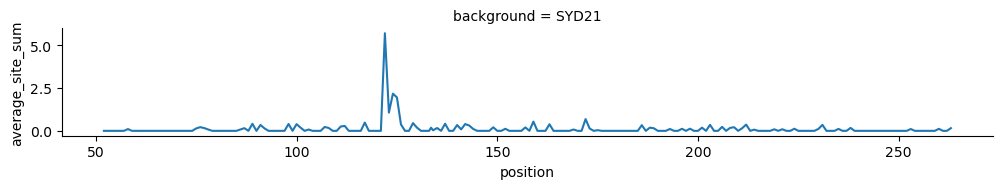

In [26]:
#initialize an escape_df that holds all of the escape mutations above a specified threshold
escape_df=pd.DataFrame()

global_threshold = 0.5

dict_all_abs = {'UCA860':['SN89'],
                  'CH65':['SN89','SI06'],
                  'CH65_ND':['SN89'],
                  'UCA652':['SN89'],
                  'H2227':['SN89','SI06'],
                  'H1244':['SN89','SI06'],
                  'H1825':['SN89'],
                  'H679':['SN89'],
                  'UCA641':['SN89'],
                  'H1270':['SN89'],
                  'H1261':['SN89'],
                  'Ab6649':['USSR77','SN89','SI06'],
                  'Ab9207':['USSR77','SN89'],
                  'ADI-77474':['USSR77','SN89','SI06','SYD21'],
                  'ADI-77470':['USSR77','SN89','SI06','SYD21'],
                  'ADI-86325':['SYD21']
                 }

dict_rbs_abs = {'UCA860':['SN89'],
                  'CH65':['SN89','SI06'],
                  'CH65_ND':['SN89'],
                  'UCA652':['SN89'],
                  'H2227':['SN89','SI06'],
                  'H1244':['SN89','SI06'],
                  'H1825':['SN89'],
                  'H679':['SN89'],
                  'UCA641':['SN89'],
                  'H1270':['SN89'],
                  'H1261':['SN89'],
                 }

#use this to only run the patch abs (useful for generating the heatmaps at the different positions)
dict_lin_6649 = {'Ab6649':['USSR77','SN89','SI06'],
                  'Ab9207':['USSR77','SN89']}

#use this to only run the adimab patch abs (useful for generating the heatmaps at the different positions)
dict_adi_abs = {'ADI-77474':['USSR77','SN89','SI06','SYD21'],
                  'ADI-77470':['USSR77','SN89','SI06','SYD21'],
                  'ADI-86325':['SYD21']
                 }

#mature Abs
dict_mature_abs = {
                  'CH65':['SN89','SI06'],
                  'H2227':['SN89','SI06'],
                  'H1244':['SN89','SI06'],
                  'H1825':['SN89'],
                  'H679':['SN89'],
                  'H1270':['SN89'],
                  'H1261':['SN89'],
                 }
                
dict_test = {'CH65_ND':['SN89']}
    
selection_dict = dict_all_abs

aa_list = ['A','C','D','E','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y','-']

full_pos_df = pd.DataFrame()

position_list = []
for x in range(52,264):
    position_list.append(x)
position_list.append(133.5)

for sel in selection_dict:
    #initialize sel_dfs for each antibody
    sel_df_pos = pd.DataFrame()
    sel_df_all = pd.DataFrame()
    sel_df_pos_sites = pd.DataFrame()
    lineplot_df = pd.DataFrame()
    
    if sel in dict_rbs_abs:
        noteable_position_list = [133.5,145,156,159,189,190,192,193]
    
    if sel in dict_lin_6649:
        noteable_position_list=[126, 128, 166, 169, 171, 173]
        
    if sel in dict_adi_abs:
        noteable_position_list=[119,122,123,124,125,172]

    for bkg in selection_dict[sel]:
        
        rep1 = pd.read_csv(f'data/diffsel_output/{bkg}_R1_{sel}_diffsel.csv', dtype={'diffsel':float})
        rep2 = pd.read_csv(f'data/diffsel_output/{bkg}_R2_{sel}_diffsel.csv', dtype={'diffsel':float})
        rep1_pos = rep1.query("diffsel > 0")
        rep2_pos = rep2.query("diffsel > 0")
        
        position_df = pd.DataFrame()
        position_df['position'] = position_list
        position_df['average_norm_site_sum'] = 0
        position_df['antibody'] = sel
        position_df['background'] = bkg
        
        
        # merge the positive diffsel replicate data together, using how = 'inner' will only include diffsel data that is observed in both replicates
        # if you use merge how = 'outer', fillna with 0 or with the other replicate data 
        temp_df_pos = rep1_pos.merge(rep2_pos, on='aa_substitutions',how='inner',suffixes=('_R1','_R2'))
        
        #fill na with 0 for outer merge
        #temp_df_pos = rep1_pos.merge(rep2_pos, on='aa_substitutions',how='outer',suffixes=('_R1','_R2')).fillna(0)
        
        #fill na with data from other replicate for outer merge
        #temp_df_pos = rep1_pos.merge(rep2_pos, on='aa_substitutions',how='outer',suffixes=('_R1','_R2'))
        #temp_df_pos['diffsel_R1'] = temp_df_pos['diffsel_R1'].fillna(temp_df_pos['diffsel_R2'])
        #temp_df_pos['diffsel_R2'] = temp_df_pos['diffsel_R2'].fillna(temp_df_pos['diffsel_R1']) 
        
        # merge all the replicate data together, how = 'outer' will include all data, NaNs will be filled below
        temp_df_all = rep1.merge(rep2, on='aa_substitutions',how='outer',suffixes=('_R1','_R2'))
        
        # create a temp_df list of each to loop through both dfs
        temp_df_list = [temp_df_pos,temp_df_all]
        
        # loop through temp_dfs and assign bkg, sel, normalized scores, and averages
        counter = 0
        for df in temp_df_list:
            counter += 1
            df['background'] = bkg
            df['antibody'] = sel
            df['normalized_R1'] = df['diffsel_R1']/df['diffsel_R1'].max()
            df['normalized_R2'] = df['diffsel_R2']/df['diffsel_R2'].max()
            #the two lines below are min-max normalization, above is normalization only to the max
            #df['normalized_R1'] = (df['diffsel_R1']-df['diffsel_R1'].min()) / (df['diffsel_R1'].max()-df['diffsel_R1'].min())
            #df['normalized_R2'] = (df['diffsel_R2']-df['diffsel_R2'].min()) / (df['diffsel_R2'].max()-df['diffsel_R2'].min())
            #df['normalized_R1'] = (df['diffsel_R1']-0.02406851628538155) / (8-0.02406851628538155)
            #df['normalized_R2'] = (df['diffsel_R2']-0.02406851628538155) / (8-0.02406851628538155)
            if counter == 2:
                for idx,row in df.iterrows():
                    if pd.isna(df.at[idx,'normalized_R1']) == True and pd.isna(df.at[idx,'normalized_R2']) == True:
                        df.at[idx,'normalized_R1'] = 1000
                        df.at[idx,'normalized_R2'] = 1000 
                    if pd.isna(df.at[idx,'normalized_R1']) == True and pd.isna(df.at[idx,'normalized_R2']) == False:
                        df.at[idx,'normalized_R1'] = 1000
                    if pd.isna(df.at[idx,'normalized_R1']) == False and pd.isna(df.at[idx,'normalized_R2']) == True:
                        df.at[idx,'normalized_R2'] = 1000
            df['diffsel_average'] = (df['diffsel_R1']+df['diffsel_R2'])/2
            df['normalized_average'] = (df['normalized_R1']+df['normalized_R2'])/2
            df['position'] = df['aa_substitutions'].str[1:-1]
        
        #what columns to keep and in what order
        cols = ['antibody','background','aa_substitutions','diffsel_R1','diffsel_R2','normalized_R1','normalized_R2','diffsel_average','normalized_average','position']
        temp_df_pos = temp_df_pos[cols]
        temp_df_all = temp_df_all[cols]
        temp_df_pos_sites = temp_df_pos.groupby(['antibody','background','position']).agg({'normalized_R1':'sum','normalized_R2':'sum','diffsel_R1':'sum','diffsel_R2':'sum'}).reset_index().rename(columns={'normalized_R1':'site_sum_R1','normalized_R2':'site_sum_R2','diffsel_R1':'diffsel_site_sum_R1','diffsel_R2':'diffsel_site_sum_R2'})
        temp_df_pos_sites['normalized_site_sum_R1'] = temp_df_pos_sites['diffsel_site_sum_R1']/temp_df_pos_sites['diffsel_site_sum_R1'].max()
        temp_df_pos_sites['normalized_site_sum_R2'] = temp_df_pos_sites['diffsel_site_sum_R2']/temp_df_pos_sites['diffsel_site_sum_R2'].max()
        temp_df_pos_sites['average_site_sum'] = (temp_df_pos_sites['site_sum_R1']+temp_df_pos_sites['site_sum_R2'])/2
        temp_df_pos_sites['position'] = temp_df_pos_sites['position'].astype(float)
                                          
                      
        # concatenate temporary dfs into larger dfs for multiple backgrounds
        # concatenate temporary d
        sel_df_pos = pd.concat([sel_df_pos,temp_df_pos],ignore_index=True)
        sel_df_all = pd.concat([sel_df_all,temp_df_all],ignore_index=True)
        sel_df_pos_sites = pd.concat([sel_df_pos_sites,temp_df_pos_sites],ignore_index=True)
        escape_df = pd.concat([escape_df,temp_df_pos.query(f"normalized_R1 > {global_threshold} & normalized_R2 > {global_threshold}")],ignore_index=True)
        temp_df_lineplot = temp_df_pos_sites.merge(position_df, on=['antibody','background','position'], how='right').fillna(0).rename(columns={'average_norm_site_sum_x':'average_norm_site_sum'})[['antibody','background','position','average_site_sum']]
        lineplot_df = pd.concat([lineplot_df,temp_df_lineplot],ignore_index=True)
        
        #export csv file for correlation plots
        temp_df_pos.to_csv(f"data/corrplot_csvs/by_mutation/{sel}_{bkg}_corrplot.csv")
        temp_df_pos_sites.to_csv(f"data/corrplot_csvs/by_site/{sel}_{bkg}_corrplot.csv")
        temp_df_lineplot.to_csv(f"data/lineplot_csvs/{sel}_{bkg}_lineplot.csv")
        
        #generate heatmap csv file
        # loop through position list, query that position, convert it into a heatmap-like csv, and concatenate it to the heatmap df
        heatmap_df_pos = make_heatmap_csv(input_df=temp_df_pos,position_list=noteable_position_list,aas=aa_list,fillna_value=0)
        heatmap_df_pos.to_csv(f"data/heatmap_csvs/positive_diffsel/{sel}_{bkg}_heatmap.csv")

        heatmap_df_all = make_heatmap_csv(input_df=temp_df_all,position_list=noteable_position_list,aas=aa_list,fillna_value=1000)
        heatmap_df_all.to_csv(f"data/heatmap_csvs/all_diffsel/{sel}_{bkg}_heatmap.csv")
        
        #fillna values and export to csv
        #heatmap_df.fillna(0).to_csv(f"data/heatmap_csvs/{sel}_{bkg}_heatmap.csv")
    full_pos_df = pd.concat([full_pos_df,sel_df_pos],ignore_index=True)
    #plot the correlation plots for the dictionary
    g = sns.FacetGrid(sel_df_pos,col='background')
    g.map_dataframe(sns.scatterplot,x='normalized_R1',y='normalized_R2')
    g.map(corrfunc, 'normalized_R1', 'normalized_R2')
    g.map(num_escape,'normalized_R1','normalized_R2',threshold=global_threshold,label="# muts")
    g.set_titles(f"{sel}_"+"{col_name}")  # use this argument literally
    g.set_axis_labels(x_var="Escape Replicate 1", y_var="Escape Replicate 2")
    g.set(ylim=(-0.2, 1.2))
    g.set(xlim=(-0.2, 1.2))
    
    #plot sitewise correlation plots
    g = sns.FacetGrid(sel_df_pos_sites,col='background')
    g.map_dataframe(sns.scatterplot,x='normalized_site_sum_R1',y='normalized_site_sum_R2')
    g.map(corrfunc, 'normalized_site_sum_R1', 'normalized_site_sum_R2')
    g.map(num_escape,'normalized_site_sum_R1','normalized_site_sum_R2',threshold=0.25,label="# sites")
    g.set_titles(f"{sel}_"+"{col_name}")  # use this argument literally
    g.set_axis_labels(x_var="Escape Replicate 1", y_var="Escape Replicate 2")
    g.set(ylim=(-0.2, 1.2))
    g.set(xlim=(-0.2, 1.2))
    
    #plot line plot
    g = sns.FacetGrid(data = lineplot_df, row = 'background',aspect=5, height=2)
    g.map_dataframe(sns.lineplot,x='position',y='average_site_sum')
    

In [11]:
full_pos_df['diffsel_average'].max()

12.642798882405028

In [6]:
sel_df_pos.to_csv('ADI-86325_SYD21_test')

In [9]:
heatmap_df_pos

,position,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y,-
2,133.5,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,145,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,156,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
5,159,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
0,189,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.351256,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.205539,0.0,0.0,0.0
6,190,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
7,192,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,193,0.0,0.0,0.0,0.219769,0.0,0.0,0.0,0.000000,0.0,0.0,0.278325,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [4]:
temp_df_pos = temp_df_all.query(" diffsel_R1 > 0 or diffsel_R2 > 0").fillna(0)
temp_df_pos

,antibody,background,aa_substitutions,diffsel_R1,diffsel_R2,normalized_R1,normalized_R2,diffsel_average,normalized_average,position
0,ADI-86325,SYD21,T124N,7.886151,7.615330,1.000000,0.991743,7.750741,0.995871,124
1,ADI-86325,SYD21,P122D,7.412646,7.730300,0.969690,1.000000,7.571473,0.984845,122
2,ADI-86325,SYD21,S125E,7.051581,7.176151,0.946577,0.960201,7.113866,0.953389,125
3,ADI-86325,SYD21,P122N,6.940950,6.957893,0.939496,0.944526,6.949422,0.942011,122
4,ADI-86325,SYD21,P122E,6.608468,7.722529,0.918213,0.999442,7.165499,0.958827,122
...,...,...,...,...,...,...,...,...,...,...
1350,ADI-86325,SYD21,R220Q,0.000000,0.022526,1000.000000,0.446426,0.000000,500.223213,220
1351,ADI-86325,SYD21,L236A,0.000000,0.016710,1000.000000,0.446008,0.000000,500.223004,236
1352,ADI-86325,SYD21,T76H,0.000000,0.016112,1000.000000,0.445966,0.000000,500.222983,76
1353,ADI-86325,SYD21,D263-,0.000000,0.015277,1000.000000,0.445906,0.000000,500.222953,263


In [24]:
#compare escape mutation values between antibodies/backgrounds
aa_list = ['A','C','D','E','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y','-']
comparison_dict = {'UCA860 CH65':'SN89 SN89',
                   'UCA652 H1244':'SN89 SN89',
                   'UCA652 H2227':'SN89 SN89',
                   'UCA641 H1261':'SN89 SN89',
                   'UCA641 H1270':'SN89 SN89',
                   'CH65 CH65':'SI06 SN89',
                   'H1244 H1244':'SI06 SN89',
                   'H2227 H2227':'SI06 SN89',
                   'Ab6649 Ab6649':'SN89 USSR77',
                   'Ab6649 Ab6649':'SI06 USSR77',
                   'Ab9207 Ab9207':'SN89 USSR77',
                   'H1244 H2227':'SN89 SN89',
                   'H1244 H2227':'SI06 SI06'
                  }
for antibodies,backgrounds in comparison_dict.items():
    for s in ['positive_diffsel','all_diffsel']:
        ab1 = antibodies.split()[0]
        bkg1 = backgrounds.split()[0]

        ab2 = antibodies.split()[1]
        bkg2 = backgrounds.split()[1]
    
        df1 = pd.read_csv(f"data/heatmap_csvs/{s}/{ab1}_{bkg1}_heatmap.csv",index_col=0).reset_index(drop=True)
        df2 = pd.read_csv(f"data/heatmap_csvs/{s}/{ab2}_{bkg2}_heatmap.csv",index_col=0).reset_index(drop=True)

        diff_df = df1.compare(df2, keep_equal=True, keep_shape=True)

        delta_df = pd.DataFrame()
        delta_df['position'] = diff_df[('position','self')]

        for aa in aa_list:
            #delta_df['position'] = diff_df['position']
            delta_df[aa] = diff_df[(aa,'self')]-diff_df[(aa,'other')]

        delta_df.to_csv(f"data/heatmap_csvs/comparisons/{s}/{ab1}_{bkg1}_compare_{ab2}_{bkg2}_heatmap.csv")

In [25]:
#polyclonal escape heatmap

noteable_position_list = [133.5,145,156,159,189,190,192,193]
escape_df_rbs_abs = pd.DataFrame()

for ab in dict_mature_abs:
    temp_df = escape_df.query(f"antibody == '{ab}'")
    escape_df_rbs_abs = pd.concat([escape_df_rbs_abs,temp_df],ignore_index=True)

escape_df_rbs_abs['count'] = 1

escape_ab_counts_position = escape_df_rbs_abs.groupby(['background','aa_substitutions','position']).agg({'count':'sum'}).reset_index()
escape_ab_counts_site = escape_df_rbs_abs.groupby(['background','position']).agg({'count':'sum'}).reset_index()

for bkg in ['SN89','SI06']:
    df = escape_ab_counts_position.query(f"background == '{bkg}' ")
    heatmap_df = pd.DataFrame()
    
    for p in noteable_position_list:
        temp_df = df.query(f"position == '{p}' ")
        temp_df['mut_aa']=temp_df['aa_substitutions'].str[-1:]
        temp_pivot = temp_df.pivot_table(index = 'position', columns = 'mut_aa', values = 'count').reset_index()
        heatmap_df = pd.concat([heatmap_df,temp_pivot],ignore_index=True)
        
    #loop through all amino acids and if it is not in the heatmap df (because that aa wasn't selected for), make its value NaN
    for aa in aa_list:
        if aa not in heatmap_df.columns:
            heatmap_df[f'{aa}'] = np.nan
        else:
            continue
        
    # make sure all the positions are included
    for p in noteable_position_list:
        if str(p) not in list(heatmap_df['position']):
            t_df = pd.DataFrame()
            t_df['position'] = [f'{p}']
            heatmap_df = pd.concat([heatmap_df,t_df],ignore_index=True)
        
    #only keep the position and aas
    heatmap_df = heatmap_df[['position']+aa_list]
        
    #sort the values by position so all heatmaps look the same
    heatmap_df = heatmap_df.sort_values(by='position',ascending=True).fillna(0)
        
    #fillna values and export to csv
    heatmap_df.fillna(0).to_csv(f"data/num_abs_escaped_csvs/{bkg}_heatmap_num_abs_escaped.csv")

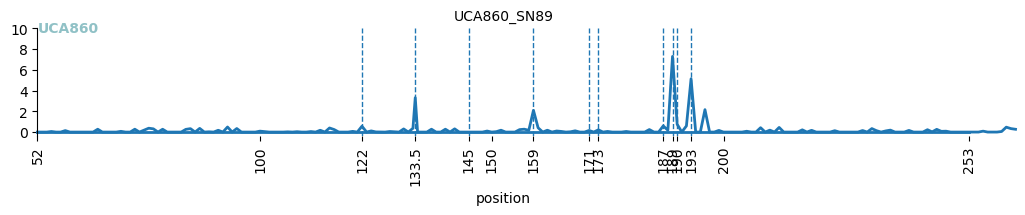

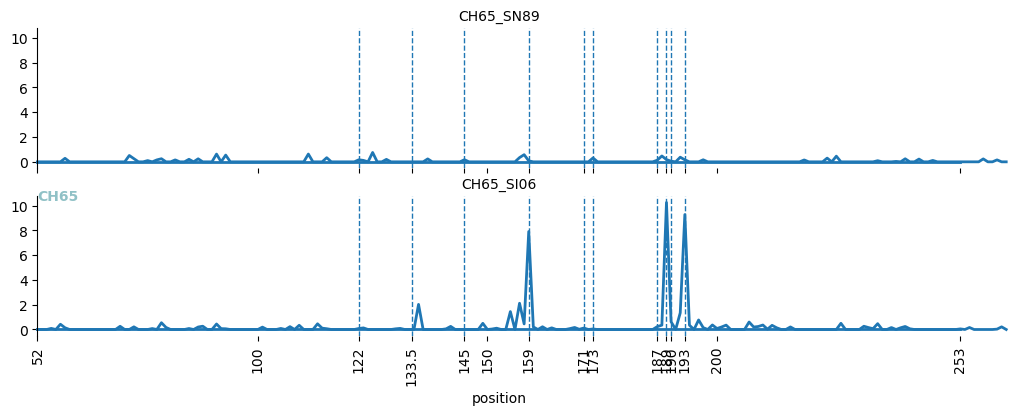

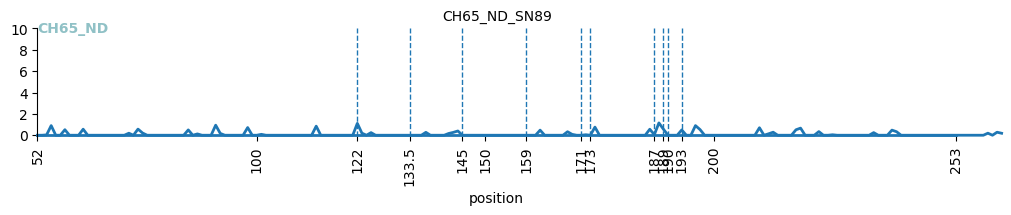

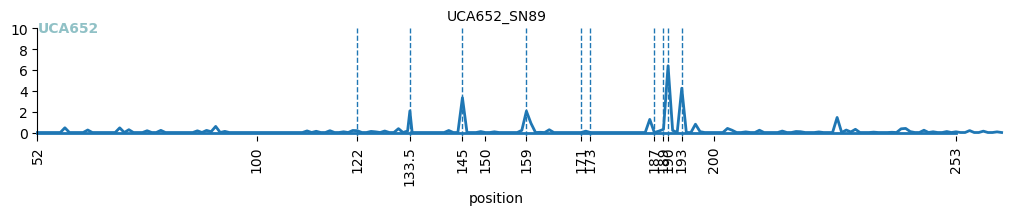

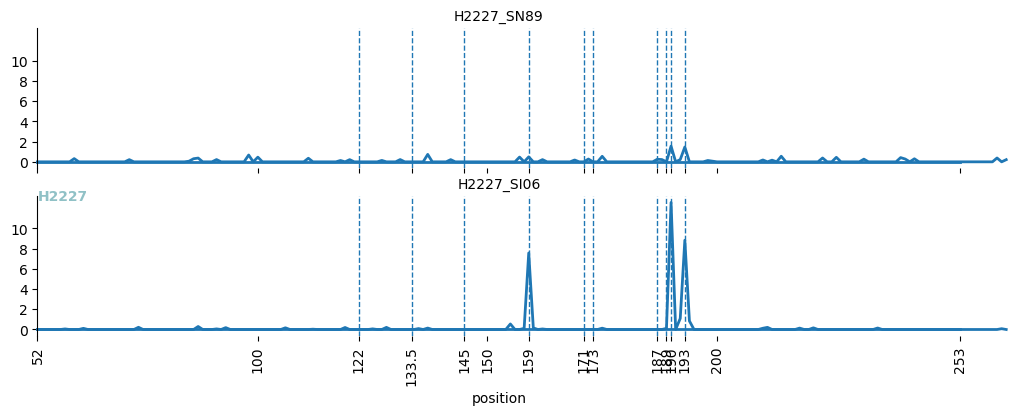

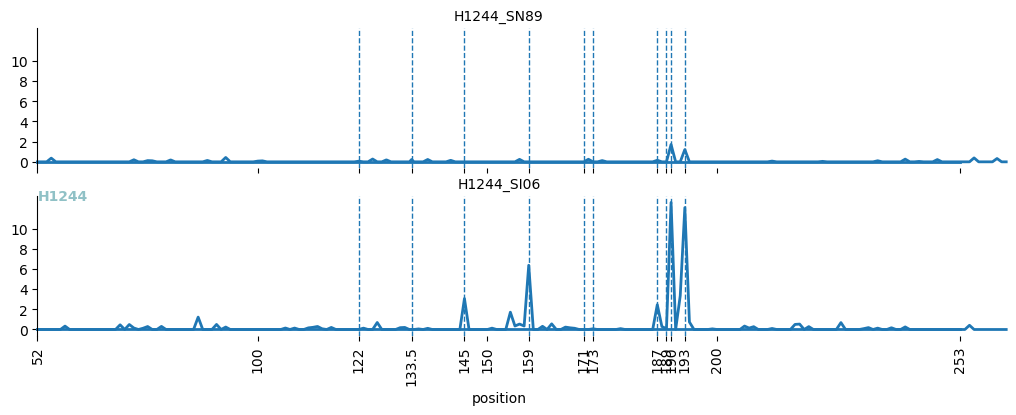

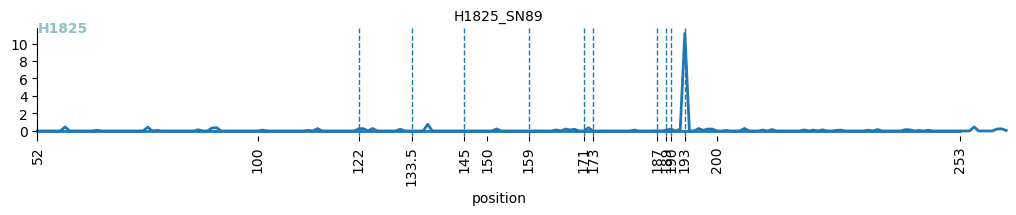

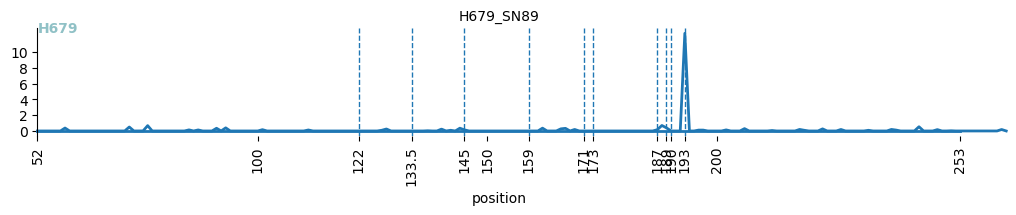

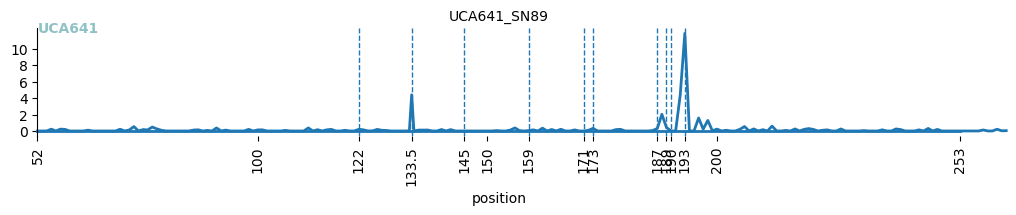

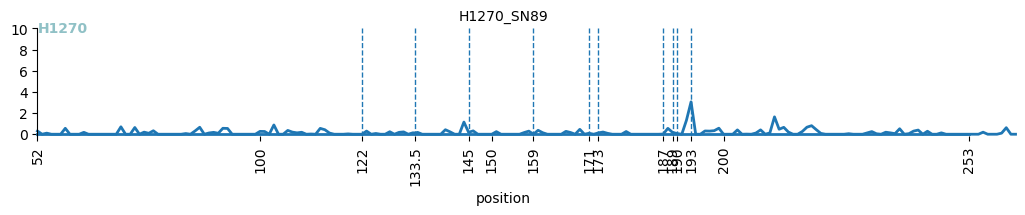

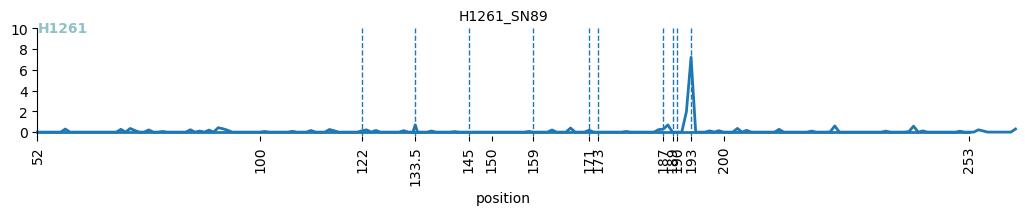

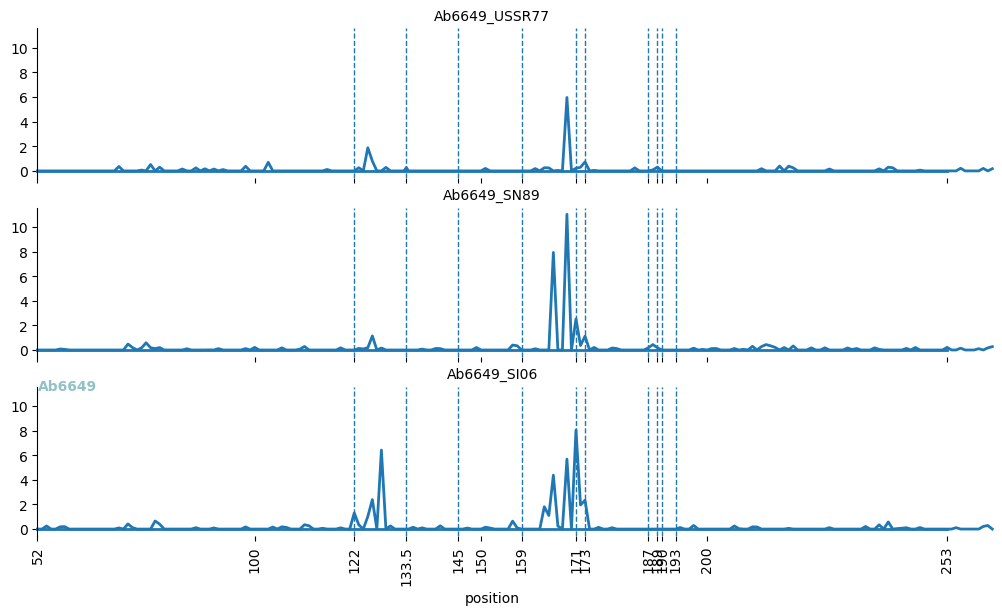

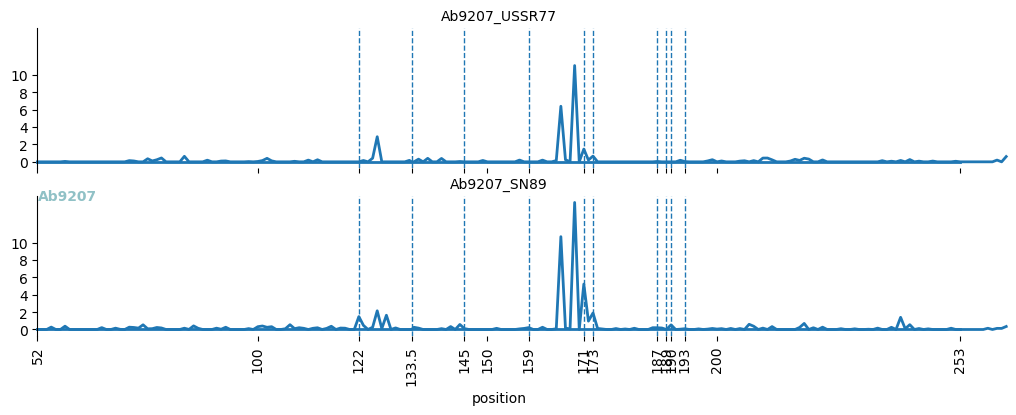

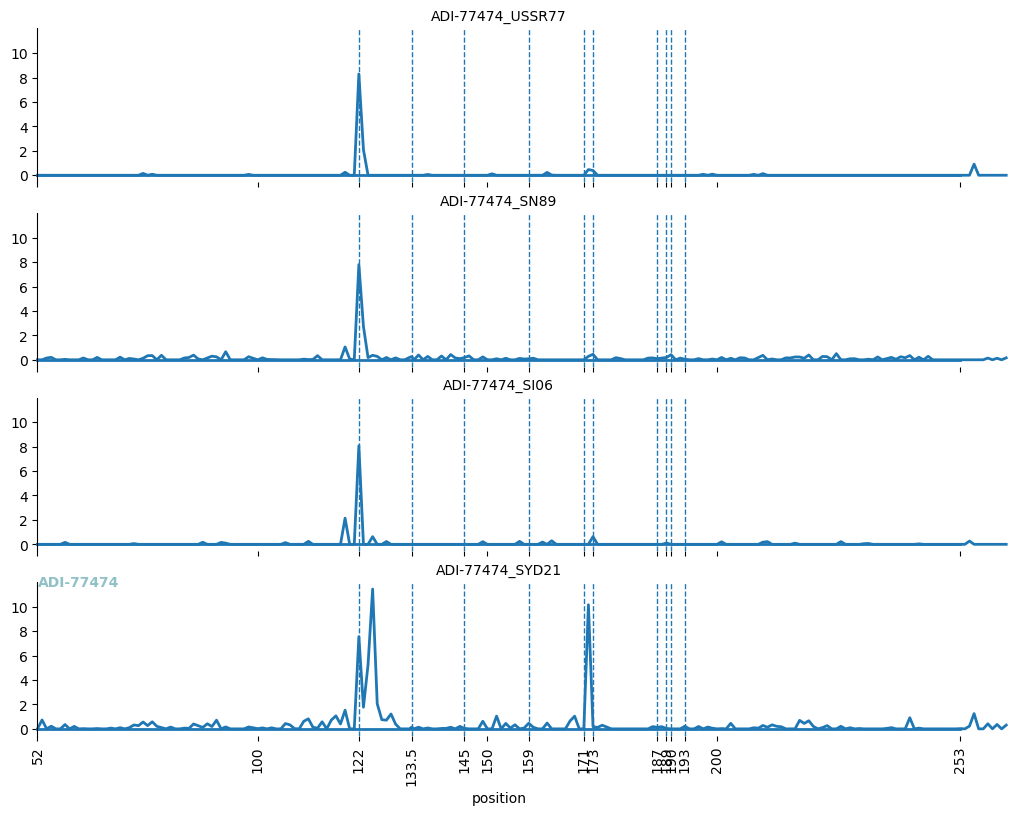

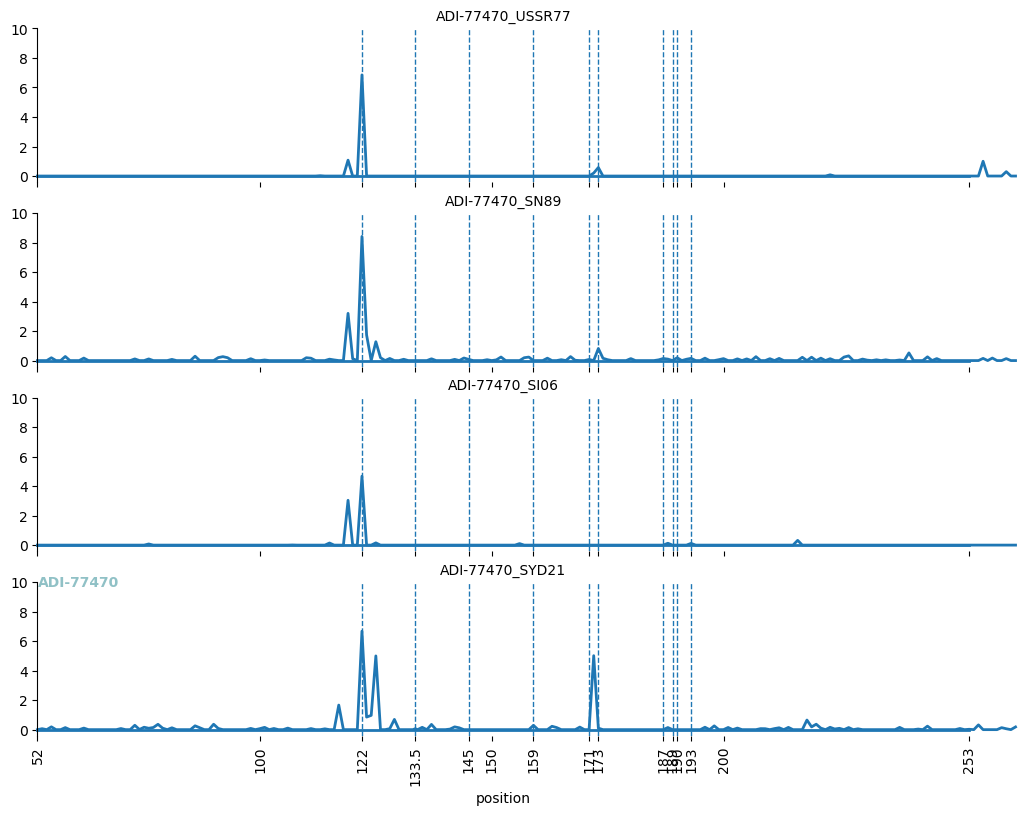

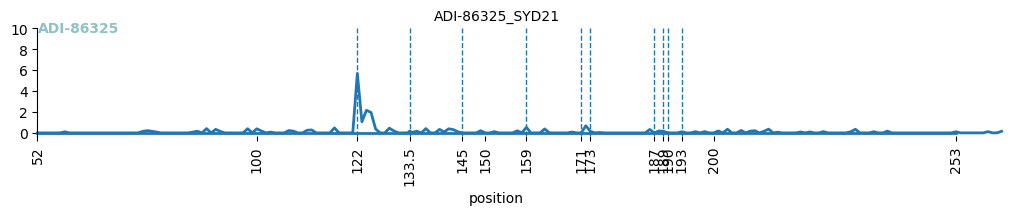

In [510]:
#lineplots
full_pos_df['mutation'] = full_pos_df['aa_substitutions'].str[1:]
full_pos_df['position'] = full_pos_df['mutation'].str[:-1]

position_list = []
for x in range(52,264):
    position_list.append(x)
    
position_list.append(133.5)

antibody_selections = {'UCA860':['SN89'],
                  'CH65':['SN89','SI06'],
                  'CH65_ND':['SN89'],
                  'UCA652':['SN89'],
                  'H2227':['SN89','SI06'],
                  'H1244':['SN89','SI06'],
                  'H1825':['SN89'],
                  'H679':['SN89'],
                  'UCA641':['SN89'],
                  'H1270':['SN89'],
                  'H1261':['SN89'],
                  'Ab6649':['USSR77','SN89','SI06'],
                  'Ab9207':['USSR77','SN89'],
                  'ADI-77474':['USSR77','SN89','SI06','SYD21'],
                  'ADI-77470':['USSR77','SN89','SI06','SYD21'],
                  'ADI-86325':['SYD21']
                 }

pal = ['#7fcdbb','#41b6c4','#1d91c0']

for ab in antibody_selections:
    ab_df = pd.DataFrame()
    for bkg in antibody_selections[ab]:
        temp_df = full_pos_df.query(f"antibody == '{ab}' & background == '{bkg}' ")
        site_agg = temp_df.groupby(['antibody','background','position']).agg({'average':'sum'}).reset_index().rename(columns={'average':'site_sum'})
        
        position_df = pd.DataFrame()
        position_df['position'] = position_list
        position_df['site_sum'] = 0
        position_df['antibody'] = ab
        position_df['background'] = bkg
        
        site_agg['position'] = site_agg['position'].astype(float)
        site_agg = site_agg.merge(position_df, on=['antibody','background','position'], how='right').fillna(0).drop(columns='site_sum_y').rename(columns={'site_sum_x':'site_sum'})
        
        ab_df = pd.concat([ab_df,site_agg],ignore_index=True)
        
        ab_df_out = ab_df.query(f"antibody == '{ab}' & background == '{bkg}' ")
        ab_df_out.to_csv(f"data/lineplot_csvs/{ab}_{bkg}_lineplot.csv")
    
    # Initialize the FacetGrid object
    pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
    #ab_df=ab_df.query(" position >= 100 & position <= 200 ")
    g = sns.FacetGrid(data = ab_df, row = 'background',aspect=5, height=2, palette=pal)

    # Draw the densities in a few steps
    g.map_dataframe(sns.lineplot, x='position', y='site_sum',linewidth=2,clip_on=False)

    # passing color=None to refline() uses the hue mapping
    g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)
    notable_positions = [122,133.5,145,159,171,173,187,189,190,193]
    xtick_list = [52,100,150,200,253]+notable_positions
    for pos in notable_positions:
        g.refline(x=pos, linewidth=1, linestyle="dashed", color = None)
    
    # Set the subplots to overlap
    g.figure.subplots_adjust(hspace=.2)

    # Remove axes details that don't play well with overlap
    g.set_titles(f"{ab}"+"_{row_name}")
    g.set(yticks=[0,2,4,6,8,10], xticks=xtick_list,ylabel="",xlim=(min(xtick_list),max(xtick_list)))
    g.set_xticklabels(labels=xtick_list,rotation=90)
    g.despine(bottom=True, left=False)
    
    ax = plt.gca()
    hplacement_ab = 0
    ax.text(hplacement_ab, 1, f"{ab}", fontweight="bold", color=pal[0],
                ha="left", va="center", transform=ax.transAxes)
    #ax.text(hplacement_ab, 1, f"{ab}", fontweight="bold", color=pal[0],
                #ha="left", va="center", transform=ax.transAxes)
    #ax.text(hplacement_ab, 1, f"{ab}", fontweight="bold", color=pal[0],
                #ha="left", va="center", transform=ax.transAxes)

In [114]:
ab_df_out

,antibody,background,position,site_sum
213,CH65,SI06,52.0,0.000000
214,CH65,SI06,53.0,0.238959
215,CH65,SI06,54.0,0.000000
216,CH65,SI06,55.0,0.082999
217,CH65,SI06,56.0,0.000000
...,...,...,...,...
421,CH65,SI06,260.0,0.000000
422,CH65,SI06,261.0,0.029268
423,CH65,SI06,262.0,0.186326
424,CH65,SI06,263.0,0.000000


In [ ]:
#lineplots by background

pos_diffsel_df['mutation'] = pos_diffsel_df['aa_substitutions'].str[1:]
pos_diffsel_df['position'] = pos_diffsel_df['mutation'].str[:-1]

position_list = []
for x in range(52,264):
    position_list.append(x)
    
position_list.append(133.5)

background_selections = {'USSR77':['Ab6649','Ab9207','ADI-77474','ADI-77470'],
                         'SN89':['UCA860','CH65','CH65_ND','UCA652','H2227','H1244','H1825','H679','UCA641','H1270','H1261','Ab6649','Ab9207','ADI-77474','ADI-77470'],
                         'SI06':['CH65','H2227','H1244','Ab6649','ADI-77474','ADI-77470'],
                         'SYD21':['ADI-77474','ADI-77470','ADI-86325']
                        }

pal = ['#7fcdbb','#41b6c4','#1d91c0']

for bkg in background_selections:
    bkg_df = pd.DataFrame()
    for ab in background_selections[bkg]:
        temp_df = pos_diffsel_df.query(f"antibody == '{ab}' & background == '{bkg}' ")
        site_agg = temp_df.groupby(['antibody','background','position']).agg({'average':'sum'}).reset_index().rename(columns={'average':'site_sum'})
        
        position_df = pd.DataFrame()
        position_df['position'] = position_list
        position_df['site_sum'] = 0
        position_df['antibody'] = ab
        position_df['background'] = bkg
        
        site_agg['position'] = site_agg['position'].astype(float)
        site_agg = site_agg.merge(position_df, on=['antibody','background','position'], how='right').fillna(0).drop(columns='site_sum_y').rename(columns={'site_sum_x':'site_sum'})
        
        bkg_df = pd.concat([bkg_df,site_agg],ignore_index=True)
    
    # Initialize the FacetGrid object
    pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
    g = sns.FacetGrid(data = bkg_df, row = 'antibody',aspect=5, height=2, palette=pal)

    # Draw the densities in a few steps
    g.map_dataframe(sns.lineplot, x='position', y='site_sum',linewidth=2,clip_on=False)

    # passing color=None to refline() uses the hue mapping
    g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)
    g.refline(x=193, linewidth=1, linestyle="-", color = None)
    
    # Set the subplots to overlap
    g.figure.subplots_adjust(hspace=.2)

    # Remove axes details that don't play well with overlap
    g.set_titles(f"{bkg}"+"_{row_name}")
    g.set(yticks=[0,2,4,6,8,10], ylabel="")
    g.despine(bottom=True, left=False)
    
    ax = plt.gca()
    hplacement_ab = 0
    ax.text(hplacement_ab, 1, f"{ab}", fontweight="bold", color=pal[0],
                ha="left", va="center", transform=ax.transAxes)
    #ax.text(hplacement_ab, 1, f"{ab}", fontweight="bold", color=pal[0],
                #ha="left", va="center", transform=ax.transAxes)
    #ax.text(hplacement_ab, 1, f"{ab}", fontweight="bold", color=pal[0],
                #ha="left", va="center", transform=ax.transAxes)

In [416]:
escape_df['mutation'] = escape_df['aa_substitutions'].str[1:]
escape_df['average_escape'] = (escape_df['normalized_R1']+escape_df['normalized_R2'])/2
#escape_pivot = escape_df.pivot_table(index='mutation',columns=['antibody','background'],values='average_escape').reset_index()
pd.set_option('display.max_rows',10)
escape_df['background_mut']=escape_df['background']+"_"+escape_df['mutation']
escape_df.query("mutation == '145R' ")

,antibody,background,aa_substitutions,diffsel_R1,diffsel_R2,normalized_R1,normalized_R2,average,mutation,average_escape,background_mut
224,UCA652,SN89,S145R,3.118788,4.683672,0.427707,0.573054,0.500381,145R,0.500381,SN89_145R
391,H1244,SI06,S145R,6.860514,6.375668,0.893705,0.794293,0.843999,145R,0.843999,SI06_145R


In [387]:
#selections_list = [('UCA860','SN89'),('CH65','SI06')],('',''),('',''),('',''),('',''),('',''),('',''),('',''),('',''),('',''),('',''),('',''),('',''),('',''),('',''),('',''),('',''),('',''),('',''),('',''),('',''),('',''),('',''),('',''),('','')]

cols=[('mutation',''),('UCA860','SN89')]
cols_sels=cols[1:]
escape_query_df = escape_pivot[cols].dropna(subset=cols_sels,how='all').reset_index(drop=True)
escape_query_df['position']=escape_query_df['mutation'].str[:-1].astype(float)
pd.set_option('display.max_rows',None)
#escape_query_df.columns = ['_'.join(col).strip() for col in escape_query_df.columns.values]
#escape_query_df['UCA860_SN89']=escape_query_df['UCA860_SN89'].astype(float)
escape_query_df = escape_query_df.sort_values(by=['position',cols[1]],ascending=[True,False],kind='quicksort')
escape_query_df

antibody,mutation,UCA860,position
background,,SN89,
2,133.5E,0.813146,133.5
0,133.5-,0.786776,133.5
1,133.5D,0.778449,133.5
4,159E,0.764347,159.0
3,159D,0.540840,159.0
5,189D,0.971656,189.0
6,189E,0.762792,189.0
8,189L,0.697270,189.0
10,189Q,0.646094,189.0


In [410]:
#compare escape mutation values between antibodies/backgrounds

ab1 = 'UCA860'
bkg1 = 'SN89'

ab2 = 'CH65'
bkg2 = 'SN89'

df1 = pd.read_csv(f"data/heatmap_csvs/{ab1}_{bkg1}_heatmap.csv",index_col=0).reset_index(drop=True)
df2 = pd.read_csv(f"data/heatmap_csvs/{ab2}_{bkg2}_heatmap.csv",index_col=0).reset_index(drop=True)

diff_df = df1.compare(df2, keep_equal=True, keep_shape=True)

aa_list = ['A','C','D','E','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y','-']

delta_df = pd.DataFrame()
delta_df['position'] = diff_df[('position','self')]

for aa in aa_list:
    #delta_df['position'] = diff_df['position']
    delta_df[aa] = diff_df[(aa,'self')]-diff_df[(aa,'other')]

delta_df.to_csv(f"data/heatmap_csvs/comparisons/{ab1}_{bkg1}_compare_{ab2}_{bkg2}_heatmap.csv")

In [194]:
diff_df

position               A               C                   D           \
      self other      self other      self     other      self    other   
0      126   126  0.000000   0.0  0.652754  0.623704  0.000000  0.00000   
1      128   128  0.220395   0.0  0.000000  0.000000  0.729210  0.00000   
2      166   166  0.000000   0.0  0.000000  0.000000  0.000000  0.00000   
3      169   169  0.000000   0.0  0.627942  0.822239  0.729107  0.73918   
4      171   171  0.000000   0.0  0.000000  0.000000  0.753340  0.00000   
5      173   173  0.000000   0.0  0.000000  0.000000  0.000000  0.00000   

          E                   F               G               H        \
       self     other      self other      self other      self other   
0  0.000000  0.312258  0.711328   0.0  0.000000   0.0  0.000000   0.0   
1  0.652186  0.000000  0.766689   0.0  0.548623   0.0  0.647125   0.0   
2  0.745310  0.000000  0.620897   0.0  0.000000   0.0  0.000000   0.0   
3  0.734975  0.892643  0.000000   0.0  0.000000   0.0  0.000000   0.0   
4  0.587082  0.202388  0.727405   0.0  0.311792   0.0  0.000000   0.0   
5  0.000000  0.000000  0.000000   0.0  0.000000   0.0  0.000000   0.0   

          I               K                   L               M            \
       self other      self     other      self other      self     other   
0  0.604253   0.0  0.000000  0.000000  0.584031   0.0  0.000000  0.000000   
1  0.000000   0.0  0.000000  0.000000  0.000000   0.0  0.000000  0.000000   
2  0.000000   0.0  0.000000  0.000000  0.795731   0.0  0.730301  0.000000   
3  0.000000   0.0  0.808396  0.894689  0.000000   0.0  0.000000  0.094694   
4  0.492739   0.0  0.000000  0.000000  0.727178   0.0  0.612940  0.000000   
5  0.000000   0.0  0.000000  0.000000  0.085343   0.0  0.000000  0.000000   

          N               P               Q                   R            \
       self other      self other      self     other      self     other   
0  0.000000   0.0  0.000000   0.0  0.000000  0.000000  0.629090  0.000000   
1  0.448494   0.0  0.000000   0.0  0.190793  0.000000  0.000000  0.000000   
2  0.000000   0.0  0.000000   0.0  0.000000  0.000000  0.874693  0.000000   
3  0.000000   0.0  0.474445   0.0  0.000000  0.000000  0.573062  0.964179   
4  0.000000   0.0  0.000000   0.0  0.000000  0.000000  0.726337  0.000000   
5  0.000000   0.0  0.000000   0.0  0.000000  0.191768  0.441154  0.000000   

          S                   T                  V               W            \
       self     other      self    other      self other      self     other   
0  0.000000  0.000000  0.000000  0.00000  0.000000   0.0  0.000000  0.000000   
1  0.336928  0.000000  0.000000  0.00000  0.000000   0.0  0.658755  0.000000   
2  0.000000  0.000000  0.000000  0.00000  0.773286   0.0  0.589001  0.000000   
3  0.000000  0.000000  0.000000  0.48032  0.000000   0.0  0.601178  0.372841   
4  0.284801  0.000000  0.000000  0.00000  0.469939   0.0  0.699200  0.000000   
5  0.564424  0.471638  0.494114  1.00000  0.000000   0.0  0.000000  0.000000   

          Y              -        
       self     other self other  
0  0.000000  0.000000  0.0   0.0  
1  0.741181  0.000000  0.0   0.0  
2  0.000000  0.000000  0.0   0.0  
3  0.741150  0.350889  0.0   0.0  
4  0.769187  0.000000  0.0   0.0  
5  0.348035  0.000000  0.0   0.0

In [192]:
delta_df

,position,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y,-
0,126,0.000000,0.029051,0.000000,-0.312258,0.711328,0.000000,0.000000,0.604253,0.000000,0.584031,0.000000,0.000000,0.000000,0.000000,0.629090,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,128,0.220395,0.000000,0.729210,0.652186,0.766689,0.548623,0.647125,0.000000,0.000000,0.000000,0.000000,0.448494,0.000000,0.190793,0.000000,0.336928,0.000000,0.000000,0.658755,0.741181,0.0
2,166,0.000000,0.000000,0.000000,0.745310,0.620897,0.000000,0.000000,0.000000,0.000000,0.795731,0.730301,0.000000,0.000000,0.000000,0.874693,0.000000,0.000000,0.773286,0.589001,0.000000,0.0
3,169,0.000000,-0.194297,-0.010073,-0.157667,0.000000,0.000000,0.000000,0.000000,-0.086293,0.000000,-0.094694,0.000000,0.474445,0.000000,-0.391117,0.000000,-0.480320,0.000000,0.228337,0.390260,0.0
4,171,0.000000,0.000000,0.753340,0.384694,0.727405,0.311792,0.000000,0.492739,0.000000,0.727178,0.612940,0.000000,0.000000,0.000000,0.726337,0.284801,0.000000,0.469939,0.699200,0.769187,0.0
5,173,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.085343,0.000000,0.000000,0.000000,-0.191768,0.441154,0.092786,-0.505886,0.000000,0.000000,0.348035,0.0


In [173]:
diff_df

position           A              C               D               E  \
      self  other self     other self other      self other      self   
0    133.5  133.5  0.0  0.000000  0.0   0.0  0.787077   0.0  0.871760   
1    145.0  145.0  0.0  0.000000  0.0   0.0  0.000000   0.0  0.000000   
2    159.0  159.0  0.0  0.085172  0.0   0.0  0.599437   0.0  0.850611   
3    189.0  189.0  0.0  0.000000  0.0   0.0  0.985740   0.0  0.878209   
4    190.0  190.0  0.0  0.000000  0.0   0.0  0.000000   0.0  0.000000   
5    193.0  193.0  0.0  0.000000  0.0   0.0  0.983129   0.0  0.699644   

                    F                   G               H               I  \
      other      self     other      self other      self other      self   
0  0.000000  0.000000  0.000000  0.461471   0.0  0.000000   0.0  0.000000   
1  0.000000  0.000000  0.000000  0.000000   0.0  0.000000   0.0  0.000000   
2  0.000000  0.299139  0.000000  0.000000   0.0  0.132865   0.0  0.000000   
3  0.000000  0.000000  0.186863  0.000000   0.0  0.330350   0.0  0.379732   
4  0.000000  0.000000  0.000000  0.335985   0.0  0.265770   0.0  0.197077   
5  0.166979  0.156041  0.000000  0.000000   0.0  0.000000   0.0  0.616195   

                K               L                   M              N        \
  other      self other      self     other      self     other self other   
0   0.0  0.000000   0.0  0.000000  0.000000  0.056284  0.000000  0.0   0.0   
1   0.0  0.099390   0.0  0.000000  0.179706  0.000000  0.000000  0.0   0.0   
2   0.0  0.000000   0.0  0.000000  0.000000  0.000000  0.000000  0.0   0.0   
3   0.0  0.630425   0.0  0.797179  0.000000  0.644030  0.000000  0.0   0.0   
4   0.0  0.000000   0.0  0.000000  0.000000  0.000000  0.061503  0.0   0.0   
5   0.0  0.435706   0.0  0.414182  0.000000  0.197747  0.000000  0.0   0.0   

     P               Q               R               S               T        \
  self other      self other      self other      self other      self other   
0  0.0   0.0  0.000000   0.0  0.000000   0.0  0.267764   0.0  0.000000   0.0   
1  0.0   0.0  0.000000   0.0  0.000000   0.0  0.000000   0.0  0.000000   0.0   
2  0.0   0.0  0.000000   0.0  0.000000   0.0  0.000000   0.0  0.000000   0.0   
3  0.0   0.0  0.708820   0.0  0.533366   0.0  0.000000   0.0  0.000000   0.0   
4  0.0   0.0  0.000000   0.0  0.000000   0.0  0.000000   0.0  0.000000   0.0   
5  0.0   0.0  0.230308   0.0  0.000000   0.0  0.192863   0.0  0.506199   0.0   

          V               W               Y               -        
       self other      self other      self other      self other  
0  0.000000   0.0  0.000000   0.0  0.000000   0.0  0.885979   0.0  
1  0.000000   0.0  0.000000   0.0  0.000000   0.0  0.000000   0.0  
2  0.000000   0.0  0.043305   0.0  0.000000   0.0  0.000000   0.0  
3  0.320671   0.0  0.520456   0.0  0.142093   0.0  0.000000   0.0  
4  0.000000   0.0  0.000000   0.0  0.000000   0.0  0.000000   0.0  
5  0.308801   0.0  0.000000   0.0  0.312264   0.0  0.000000   0.0